BUSINESS UNDERSTANDING

The telecommunications industry is fiercely competitive, with customers having numerous service providers to choose from.  High customer churn, the rate at which subscribers discontinue service, is a significant challenge. The average annual churn rate in this industry ranges from 15% to 25%, making customer retention a top priority.  Acquiring new customers is roughly 5 to 10 times more expensive than retaining existing ones, highlighting the importance of keeping current subscribers satisfied.

To effectively reduce churn, telecom companies need to proactively identify customers at high risk of leaving. Common causes of churn include poor customer service, inadequate products, and unfavorable pricing plans. Losing customers can have serious consequences, including increased costs for customer acquisition and product development, a decline in referrals, and a reduced Customer Lifetime Value (CLV).

In today's challenging economic climate, with rising interest rates, inflation, and an uncertain job market, addressing customer churn is even more critical for telecommunications companies.

PROBLEM STATEMENT

The Sales and Marketing department at Syria Tel is struggling to retain customers due to high churn rates. This directly impacts revenue and hinders company growth.  Inefficient resource allocation limits their ability to optimize marketing campaigns.  This misallocation wastes budget and reduces the overall effectiveness of marketing efforts.  Furthermore, targeting the wrong customer segments exacerbates churn and undermines profitability.  A customer churn prediction system can address these challenges.

RELATION TO CLIENT
Implementing a customer churn prediction system offers significant benefits to the Sales and Marketing team:

Reduced Churn: Proactive identification and retention of at-risk customers will lead to higher customer lifetime value and increased revenue streams.

Optimized Campaigns: Using customer insights to tailor campaigns will maximize return on investment (ROI) and improve campaign effectiveness.

Precision Marketing: Identifying and engaging high-value prospects will result in higher conversion rates and optimized resource allocation.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV                
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [55]:
#loading data
data_path = r"C:\Users\user\Downloads\archive (4)\bigml_59c28831336c6604c800002a.csv"
data = pd.read_csv(data_path)
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


DATA UNDERSTANDING

SyriaTel Dataset (3,333 rows, 21 columns) Breakdown:

Customer Demographics (Understanding Behavior):

State (categorical) - Residence location.
Account Length (numerical) - Months with company.
Area Code (categorical) - Customer location.
Phone Number (unique identifier) - Likely anonymized.
Plan and Service Usage (Charges and Churn):

International Plan (binary) - International calling plan.
Voicemail Plan (binary) - Voicemail plan subscription.
Number of Voicemail Messages (numerical) - Total received messages.
Call Activity (Usage Patterns and Churn):

Day Minutes/Calls/Charges (numerical) - Daytime usage patterns.
Evening Minutes/Calls/Charges (numerical) - Evening usage patterns.
Night Minutes/Calls/Charges (numerical) - Nighttime usage patterns.
International Minutes/Calls/Charges (numerical) - International usage.
Customer Service Interaction (Crucial Metric):

Customer Service Calls (numerical) - Calls to customer service (dissatisfaction/self-service needs).

DATA EXPLORATION AND CLEANING

Unique Values: Identify unique values in categorical features.
Statistics: Calculate summary statistics for numerical features.
Target Distribution: Analyze churn rate (proportion of churned customers).
Irrelevant Columns: Evaluate feature relevance for prediction (remove irrelevant ones).

In [4]:
# View the Unique Values
print(data.nunique())

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


In [40]:
# Get summary of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Explore numerical data statistics
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Analyze churn distribution
churn_counts = data['churn'].value_counts()
churn_counts

False    2850
True      483
Name: churn, dtype: int64

Data Cleaning

In [8]:
#check for missing values
missing_values_by_column = data.isnull().sum()
missing_values_by_column

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
#Encoding
categorical_features = ['international plan', 'voice mail plan']
encoder = LabelEncoder()

for col in categorical_features:
  data[col] = encoder.fit_transform(data[col])

# Convert 'churn' to boolean
data['churn'] = data['churn'].astype(bool)

data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Due to an issue we had at a later code block, we will need to do remove hyphens from the phone numbers as well

In [65]:
import re
data['phone number'] = data['phone number'].apply(lambda x: re.sub(r'-', '', x))


FEATURE ENGINEERING AND EXPLORATORY DATA ANALYSIS

In [57]:
#Let's find the average total calls after creating a new column for total calls
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls']
average_total_calls = data['total calls'].mean()
print("Average Total Calls:", average_total_calls)


Average Total Calls: 300.65766576657666


In [58]:
#Call Behavior
data['call_day_night_ratio'] = data['total day calls'] / (data['total night calls'] + 1)
data['total_charge_per_day_min'] = data['total day charge'] / (data['total day minutes'] + 1)

In [59]:
#Customer Service
data['customer_service_calls_per_year'] = data['customer service calls'] / data['account length']

In [60]:
#Service Plans and Pricing
data['total_monthly_charges'] = data[['total day charge', 'total eve charge', 'total night charge']].sum(axis=1)

Feature importance

In [41]:
def analyze_feature_importance(data):
  """
  This function analyzes feature importance using a Random Forest Classifier.

  Args:
      data (pd.DataFrame): The customer churn data.

  Returns:
      pd.DataFrame: A DataFrame containing feature names and their importance scores.
  """

  # Preprocess data (remove hyphens from phone number)
  data['phone number'] = data['phone number'].apply(lambda x: re.sub(r'-', '', x))

  # Create a copy of the preprocessed data
  data_copy = data.copy(deep=True)

  # Encode categorical variables
  categorical_cols = ["international plan", "voice mail plan", "state"]

  # Label encode churn
  label_encoder = LabelEncoder()
  data_copy['churn'] = label_encoder.fit_transform(data_copy['churn'])

  # One-hot encode other categorical variables
  onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
  encoded_data = onehot_encoder.fit_transform(data_copy[categorical_cols[1:]])
  encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names(categorical_cols[1:]))
  data_copy = pd.concat([data_copy, encoded_df], axis=1)
  data_copy.drop(categorical_cols, axis=1, inplace=True)

  # Split data into features (X) and target variable (y)
  X = data_copy.drop('churn', axis=1)
  y = data_copy['churn']

  # Train-test split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train a Random Forest Classifier with hyperparameters
  random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
  random_forest_classifier.fit(X_train, y_train)

  # Extract feature importances
  feature_importances = random_forest_classifier.feature_importances_

  # Combine feature names and importances into a DataFrame
  feature_names = X.columns
  feature_importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}) 
  # Sort by importance
  feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

  return feature_importance_data

feature_importance_df = analyze_feature_importance(data.copy())
print(feature_importance_df)

                   Feature  Importance
6         total day charge    0.132743
4        total day minutes    0.120268
16  customer service calls    0.109369
9         total eve charge    0.062897
7        total eve minutes    0.058567
..                     ...         ...
58                state_RI    0.000998
20                state_AL    0.000952
19                state_AK    0.000934
31                state_IA    0.000740
30                state_HI    0.000440

[70 rows x 2 columns]


DATA VISUALIZATION

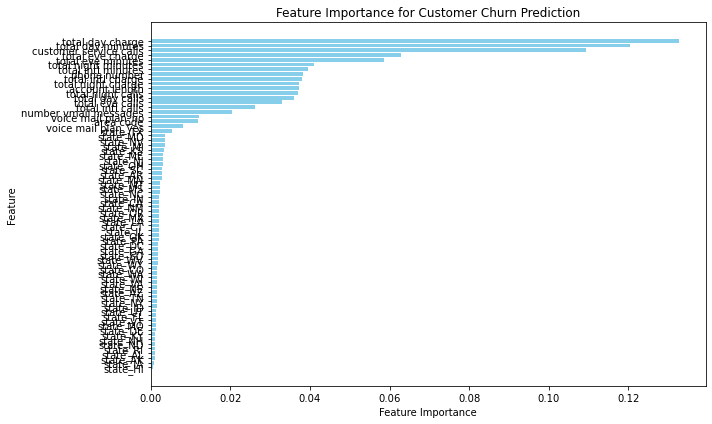

In [42]:
#Feature Importance for Customer Churn Prediction
features = feature_importance_df['Feature'].to_numpy()
importances = feature_importance_df['Importance'].to_numpy()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Customer Churn Prediction')
plt.gca().invert_yaxis()

# Display the chart
plt.tight_layout()
plt.show()

Observations

Highly Important Features:

Total Monthly Charge: This feature has the highest importance in predicting churn. It suggests that customers with higher monthly charges are more likely to churn. This aligns with the understanding that customers may churn if they feel they are not receiving adequate value for the price they pay.

Customer Service Calls: The number of customer service calls is another crucial indicator of churn. Customers who make more service calls are more likely to churn, indicating dissatisfaction or unresolved issues with the service.

Total Minutes: Total minutes, likely referring to total usage minutes (e.g., calls, data usage), also ranks high in importance. Higher usage may signal customer engagement, but it can also indicate dissatisfaction if coupled with high charges or frequent service calls.
Less Important Features:

States: The state of the customer appears to be among the least important features in predicting churn. This suggests that geographical location may not have a significant impact on churn compared to other factors such as pricing, service quality, and customer interactions.


Implications 

Focus on Pricing and Service Quality:

Pricing strategies and service quality are critical factors influencing churn. Companies should carefully balance pricing with the perceived value of their services to retain customers.

Improving service quality and reducing the need for customer service calls can help mitigate churn risk associated with dissatisfaction.

Customer Engagement and Satisfaction:

Monitoring total usage minutes and customer service interactions can provide insights into customer engagement and satisfaction levels. Proactively addressing issues and improving service features can enhance customer experience and loyalty.


Recommendations

Price Optimization:

Evaluate pricing structures to ensure they align with customer expectations and market competitiveness. Consider offering flexible pricing plans or incentives to retain high-value customers.

Service Improvement:

Invest in improving service quality to reduce the need for customer service interactions and enhance overall customer satisfaction.
Implement proactive measures to address common issues reported by customers, potentially reducing churn risk associated with service dissatisfaction.

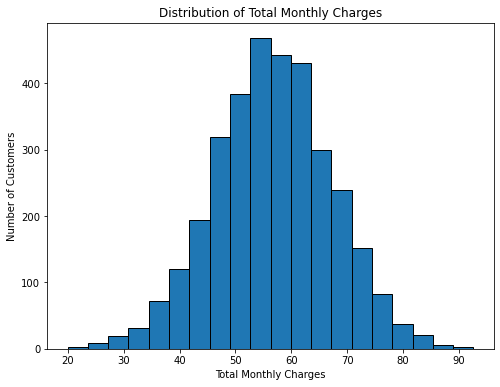

In [48]:
# histogram of Distribution of Total Monthly Charges
plt.figure(figsize=(8, 6))
plt.hist(data['total_monthly_charges'], bins=20, edgecolor='black')
plt.xlabel('Total Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Monthly Charges')
plt.show()

Obeservations

The majority of customers have total monthly charges in the range of $45 to $65.

The distribution tapers off as the charges increase or decrease from this range, suggesting fewer customers with very high or very low monthly charges.


Implications

The concentration of customers within the $45 to $65 range suggests that this is a popular and acceptable pricing tier for most customers. It might be beneficial to analyze what specific services and features are included in plans within this range to understand their appeal.


Recommendation

Enhance the services and features in the $45 to $65 range to ensure continued satisfaction and value perception.

Develop targeted marketing campaigns aimed at customers just below this range, highlighting the benefits of upgrading.

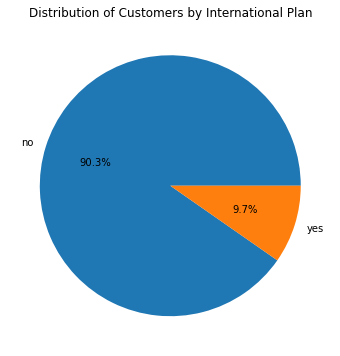

In [49]:
# pie chart of Distribution of Customers by International Plan
international_plan_counts = data['international plan'].value_counts().sort_values(ascending=False)

# Get pie chart slice labels
pie_chart_slice_labels = international_plan_counts.index.to_numpy()


# Get pie chart slice values
pie_chart_slice_values = international_plan_counts.to_numpy()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title('Distribution of Customers by International Plan')
plt.show()

Observation

High Prevalence of Non-Subscribers: Over 90% of customers do not have an international plan. This is indicated by the large blue slice of the pie chart.

Implications

Customer Preferences: The vast majority of customers may not see the value in subscribing to an international plan, possibly due to lack of need for international calling or perceived high cost.

Recommendation

Enhance Local Plan Benefits:

Improved Features: Add value to the local plans by enhancing features such as unlimited local calls, better data packages, and exclusive local deals.

Loyalty Programs: Introduce loyalty programs that reward customers for long-term subscriptions and frequent use of local services.



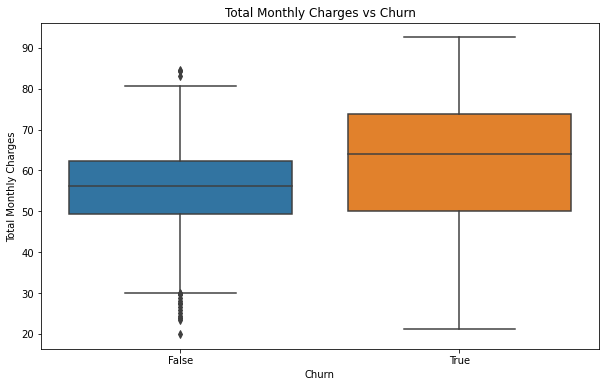

In [50]:
# Boxplot of Total Monthly Charges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total_monthly_charges', data=data)
plt.xlabel('Churn')
plt.ylabel('Total Monthly Charges')
plt.title('Total Monthly Charges vs Churn')
plt.show()


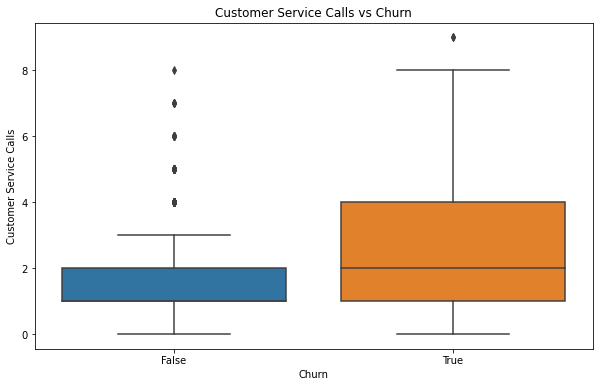

In [27]:
# Boxplot of Customer Service Calls vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='customer service calls', data=data)
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.title('Customer Service Calls vs Churn')
plt.show()


Observations

Median: The median number of customer service calls is likely higher for churned customers (True) compared to non-churned customers (False). This is shown by the line inside the box being higher for churned customers.

IQR and Spread: The spread (height of the box) and IQR for customer service calls are often greater for churned customers, indicating more variability in the number of calls made by churned customers.

Outliers: There may be more outliers or higher values for customer service calls among churned customers, suggesting that some churned customers make a significantly higher number of calls.


Implications 

Higher Customer Service Calls Correlated with Churn: The boxplot likely shows that customers who churn tend to make more customer service calls. This could imply that higher interaction with customer service is a potential indicator of dissatisfaction or issues leading to churn.

Recommendation

Implement a monitoring system to track the frequency of customer service calls.

Enhance the quality of customer service to ensure issues are resolved promptly and satisfactorily.

Train customer service representatives to handle calls more efficiently and to identify potential signs of churn.

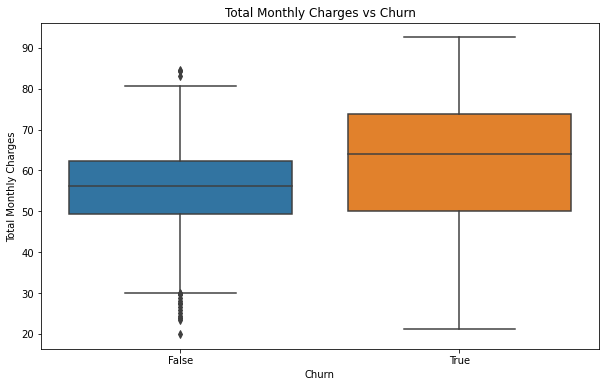

In [31]:
# Plotting Total Monthly Charges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total_monthly_charges', data=data)
plt.xlabel('Churn')
plt.ylabel('Total Monthly Charges')
plt.title('Total Monthly Charges vs Churn')
plt.show()

Observations

Higher Total Monthly Charges and Churn: Customers who churn tend to have higher total monthly charges compared to those who do not churn. This is indicated by the higher median value of total monthly charges for the churned group.

Outliers: There are notable outliers in the churned group, with some customers having total monthly charges below 30 and above 80. This suggests that while higher charges are generally associated with churn, there are exceptions where customers with very low or very high charges also churn.

Recommendations

Monitor High Charges: Identify and monitor customers with higher total monthly charges as they are more likely to churn.

Investigate Outliers: Conduct further investigation into the outliers to understand the specific reasons behind their churn, whether it's due to dissatisfaction, perceived value, or other factors.

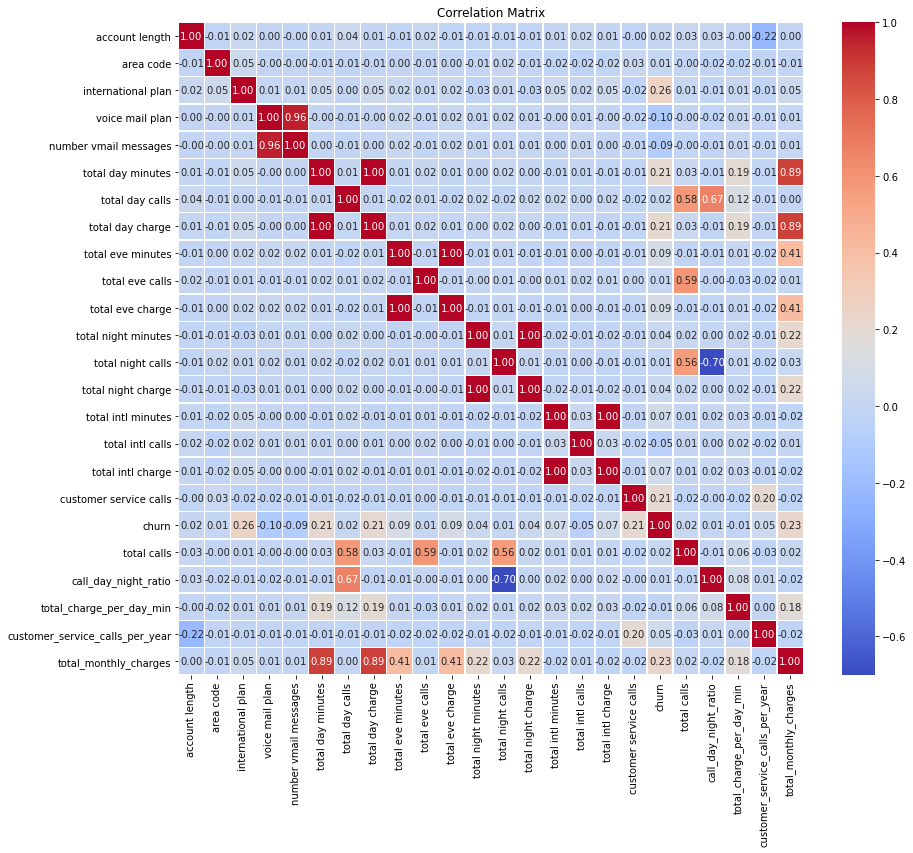

In [34]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


MODELING

Logistic Regression Model

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define your features and target
X = data.drop('churn', axis=1)
y = data['churn']

# Define categorical columns
binary_columns = ['international plan', 'voice mail plan']
onehot_columns = ['state', 'area code']

# Apply Label Encoding to binary categorical columns
label_encoders = {}
for col in binary_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Apply One-Hot Encoding to multi-category columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), onehot_columns)
    ],
    remainder='passthrough'  # Keep the remaining columns as is
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")



Accuracy: 0.848575712143928
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


The logistic regression model achieved an accuracy of 84.9%, indicating decent overall performance. However, the precision, recall, and F1 score are all 0.0, indicating that the model fails to identify any actual churn cases. The ROC AUC score of 0.5 suggests that the model's discriminative ability is no better than random guessing. This indicates a need for improvement in detecting and predicting customer churn accurately.

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predictions on the test data
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate the performance of Decision Tree Classifier
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_score_decision_tree = f1_score(y_test, y_pred_decision_tree)
roc_auc_decision_tree = roc_auc_score(y_test, y_pred_decision_tree)

# Print the evaluation metrics
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1 Score:", f1_score_decision_tree)
print("ROC AUC Score:", roc_auc_decision_tree)


Decision Tree Classifier Performance:
Accuracy: 0.9370314842578711
Precision: 0.7610619469026548
Recall: 0.8514851485148515
F1 Score: 0.8037383177570093
ROC AUC Score: 0.9018909841514186


Observations and justifications for using Decision Tree Classifier over baseline model


Higher Accuracy: The Decision Tree Classifier has a higher accuracy (93.7%) compared to the baseline model (85%), indicating that it correctly predicts the class labels more often.

Better Precision and Recall: The precision and recall of the Decision Tree Classifier are significantly higher than those of the baseline model. This means that the Decision Tree Classifier makes fewer false positive predictions (precision) and captures more true positive instances (recall).

Improved F1 Score: The F1 score of the Decision Tree Classifier is higher than that of the baseline model, indicating a better balance between precision and recall.

Implications 

Improved Customer Churn Prediction: Since the Decision Tree Classifier outperforms the baseline model in terms of accuracy, precision, recall, F1 score, and ROC AUC score, it suggests that it can better identify customers who are likely to churn. This could be valuable for businesses, as they can focus their retention efforts more effectively on those customers who are at higher risk of churning.

Reduced False Positives: The higher precision of the Decision Tree Classifier means that it is better at identifying customers who are not likely to churn without incorrectly labeling too many loyal customers as churners. This can help in reducing unnecessary retention efforts and resources spent on customers who are unlikely to churn.

Increased Retention Strategies Effectiveness: With a higher recall, the Decision Tree Classifier can capture more true positive instances of churn. This means that the model can help businesses identify a larger proportion of customers who are actually likely to churn, enabling them to implement targeted retention strategies to prevent churn more effectively.

Better Allocation of Resources: By using a more accurate churn prediction model like the Decision Tree Classifier, businesses can allocate their resources more efficiently. They can focus their retention efforts on high-risk customers identified by the model, potentially leading to cost savings and improved customer satisfaction.

